This code is for randomized matrix 10x10 (Matrix seed dispersal 10x10)

In [1]:
#Libraries needed
import igraph as ig
import os
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import subprocess

In [2]:
########## Program #########
dir = os.getcwd()  # Folder where the program is
Experiment = 'GB' #Name of the experiment
Long = 500 # Number of experiment
gamma = 5 # Values of gamma, in this case 0.01
beta = 0.01 # Values of beta, in this case 0.01 as this value is forced
Normalized = 0.4 #Value to normalize the matrix

In [3]:
MGL = [] #Matrix from the databases, narmalized
MCL = [] # Matrix from the databases, normalized and put in the form of (6) matrix from the paper 
VL = [] # Vector with the number of vertex of each web
D1 = [] # Vector with the dimension 1 of each web
D2 = [] # Equal to D1 but with dimension 2
databases = [] # Vector with the name of the databases to be used
MatrixGraphs = [] # Vector with graph matrix 
D1 = [] # Vector with dimension 1
D2 =[] # Vector with dimension 2
VL= [] # Vector with number of vertex
summatory = [] # Vector with the summation of rows and columns of the matrixes   

In [4]:
#databases_dir = '/databases/M_SD_W' # Directory of the databases

In [5]:
#files = os.listdir(dir + databases_dir)

In [6]:
#First way, it writes as ['item',..]
#f = open('filedata.txt', 'w') # .txt where put the list with the names of the databases
#f.write(str(files)) # Write the list
#f.close() # Close the file

In [7]:
#Second way, it writes as a list (as in original program)
#with open ('filedata.txt', 'w') as f:
#    for item in files:
#        f.write("%s\n" % item)
#    f.close()

In [8]:
#This is just for programing erase after done
#files = ['MSD003']

In [9]:
# This rutine allows to read the csv and put into a mtrix
#for db in files: 
#    with open (dir + databases_dir + '/' + db, newline = '') as File:
#        dataimp = csv.reader(File)
#        data = []
#        for row in dataimp:
#            data.append(row)

In [10]:
# This rutine allows to generate matrices using pandas with this routine put the gammas
for k in range(0,Long): 
    dim1 = 10
    dim2 = 10
    vertexs = dim1 + dim2
    zero_data = np.zeros(shape=(vertexs,vertexs))
    MatrixGraphP = pd.DataFrame(zero_data)
    #Create the matrix
    # Part of the cooperation
    for i in range(dim1):
        for j in range(dim1, vertexs):
            MatrixGraphP.loc[i,j] = (i+j)*k #This part is what corresponds to the database now randomized 
            MatrixGraphP.loc[j,i] = (i+j)*k #This part is what corresponds to the database now randomized
    
    summatory.append(MatrixGraphP.sum().sum()) #To calulate the sum of the rows
    #MatrixGraphP.to_csv("Matrix.csv", sep = ";" )
    #Gathering all the data
    MatrixGraphs.append(MatrixGraphP)
    D1.append(dim1)
    D2.append(dim2)
    VL.append(vertexs)        

In [11]:
# This rutine allows to generate matrices using pandas with this routine we put the betas and normalized gammas
Maximun = max(summatory)
for k in range(0,Long): 
    dim1 = 10
    dim2 = 10
    vertexs = dim1 + dim2
    MatrixGraphs[k] = Normalized*MatrixGraphs[k]/summatory[k] 
    for i in range(dim1):
        for j in range(dim1):
            MatrixGraphs[k].loc[i,j] = beta
            MatrixGraphs[k].loc[i+dim1,j+dim1] = beta
    #Diagonal
    for i in range(vertexs):
        MatrixGraphs[k].loc[i,i] = 0

In [12]:
dim1

10

In [13]:
 MatrixGraphs[1]

,0,1,2,3,4,5,6,7,8,9,10,11,12,13,14,15,16,17,18,19
0,0.000000,0.010000,0.010000,0.010000,0.010000,0.010000,0.010000,0.010000,0.010000,0.010000,0.001053,0.001158,0.001263,0.001368,0.001474,0.001579,0.001684,0.001789,0.001895,0.002000
1,0.010000,0.000000,0.010000,0.010000,0.010000,0.010000,0.010000,0.010000,0.010000,0.010000,0.001158,0.001263,0.001368,0.001474,0.001579,0.001684,0.001789,0.001895,0.002000,0.002105
2,0.010000,0.010000,0.000000,0.010000,0.010000,0.010000,0.010000,0.010000,0.010000,0.010000,0.001263,0.001368,0.001474,0.001579,0.001684,0.001789,0.001895,0.002000,0.002105,0.002211
3,0.010000,0.010000,0.010000,0.000000,0.010000,0.010000,0.010000,0.010000,0.010000,0.010000,0.001368,0.001474,0.001579,0.001684,0.001789,0.001895,0.002000,0.002105,0.002211,0.002316
4,0.010000,0.010000,0.010000,0.010000,0.000000,0.010000,0.010000,0.010000,0.010000,0.010000,0.001474,0.001579,0.001684,0.001789,0.001895,0.002000,0.002105,0.002211,0.002316,0.002421
5,0.010000,0.010000,0.010000,0.010000,0.010000,0.000000,0.010000,0.010000,0.010000,0.010000,0.001579,0.001684,0.001789,0.001895,0.002000,0.002105,0.002211,0.002316,0.002421,0.002526
6,0.010000,0.010000,0.010000,0.010000,0.010000,0.010000,0.000000,0.010000,0.010000,0.010000,0.001684,0.001789,0.001895,0.002000,0.002105,0.002211,0.002316,0.002421,0.002526,0.002632
7,0.010000,0.010000,0.010000,0.010000,0.010000,0.010000,0.010000,0.000000,0.010000,0.010000,0.001789,0.001895,0.002000,0.002105,0.002211,0.002316,0.002421,0.002526,0.002632,0.002737
8,0.010000,0.010000,0.010000,0.010000,0.010000,0.010000,0.010000,0.010000,0.000000,0.010000,0.001895,0.002000,0.002105,0.002211,0.002316,0.002421,0.002526,0.002632,0.002737,0.002842
9,0.010000,0.010000,0.010000,0.010000,0.010000,0.010000,0.010000,0.010000,0.010000,0.000000,0.002000,0.002105,0.002211,0.002316,0.002421,0.002526,0.002632,0.002737,0.002842,0.002947


In [14]:
for matrix in MatrixGraphs:
    MGL.append(matrix.copy())

In [15]:
# Montecarlo matrix
for matrix in MGL:
    MCL.append(matrix.copy())

for matrix in range(len(MCL)):
    # Gamma value are negatives
    for i in range(D1[matrix], VL[matrix]):
        for j in range(D1[matrix]):
            MCL[matrix].loc[i,j] = - MCL[matrix].loc[i,j]
            MCL[matrix].loc[j,i] = - MCL[matrix].loc[j,i]
    #Diagonal equal to 1
    for i in range( VL[matrix]):
        MCL[matrix].loc[i,i] = 1

In [16]:
MCL[499]

,0,1,2,3,4,5,6,7,8,9,10,11,12,13,14,15,16,17,18,19
0,1.000000,0.010000,0.010000,0.010000,0.010000,0.010000,0.010000,0.010000,0.010000,0.010000,-0.001053,-0.001158,-0.001263,-0.001368,-0.001474,-0.001579,-0.001684,-0.001789,-0.001895,-0.002000
1,0.010000,1.000000,0.010000,0.010000,0.010000,0.010000,0.010000,0.010000,0.010000,0.010000,-0.001158,-0.001263,-0.001368,-0.001474,-0.001579,-0.001684,-0.001789,-0.001895,-0.002000,-0.002105
2,0.010000,0.010000,1.000000,0.010000,0.010000,0.010000,0.010000,0.010000,0.010000,0.010000,-0.001263,-0.001368,-0.001474,-0.001579,-0.001684,-0.001789,-0.001895,-0.002000,-0.002105,-0.002211
3,0.010000,0.010000,0.010000,1.000000,0.010000,0.010000,0.010000,0.010000,0.010000,0.010000,-0.001368,-0.001474,-0.001579,-0.001684,-0.001789,-0.001895,-0.002000,-0.002105,-0.002211,-0.002316
4,0.010000,0.010000,0.010000,0.010000,1.000000,0.010000,0.010000,0.010000,0.010000,0.010000,-0.001474,-0.001579,-0.001684,-0.001789,-0.001895,-0.002000,-0.002105,-0.002211,-0.002316,-0.002421
5,0.010000,0.010000,0.010000,0.010000,0.010000,1.000000,0.010000,0.010000,0.010000,0.010000,-0.001579,-0.001684,-0.001789,-0.001895,-0.002000,-0.002105,-0.002211,-0.002316,-0.002421,-0.002526
6,0.010000,0.010000,0.010000,0.010000,0.010000,0.010000,1.000000,0.010000,0.010000,0.010000,-0.001684,-0.001789,-0.001895,-0.002000,-0.002105,-0.002211,-0.002316,-0.002421,-0.002526,-0.002632
7,0.010000,0.010000,0.010000,0.010000,0.010000,0.010000,0.010000,1.000000,0.010000,0.010000,-0.001789,-0.001895,-0.002000,-0.002105,-0.002211,-0.002316,-0.002421,-0.002526,-0.002632,-0.002737
8,0.010000,0.010000,0.010000,0.010000,0.010000,0.010000,0.010000,0.010000,1.000000,0.010000,-0.001895,-0.002000,-0.002105,-0.002211,-0.002316,-0.002421,-0.002526,-0.002632,-0.002737,-0.002842
9,0.010000,0.010000,0.010000,0.010000,0.010000,0.010000,0.010000,0.010000,0.010000,1.000000,-0.002000,-0.002105,-0.002211,-0.002316,-0.002421,-0.002526,-0.002632,-0.002737,-0.002842,-0.002947


In [17]:
len(MCL)

500

In [18]:
# Generating the matrix to use in CgrilliJR
for i in range(0,len(MCL)): 
    textfile = open("databases_"+Experiment+"_flat/"+str(i)+"_In.lst", "w")
    Matrix = MCL[i].values.flatten()
    for element in Matrix:
        textfile.write(str(element) + "\n")
    textfile.close()

In [19]:
# Calling the program to calculate the structural stability
os.remove("Out_"+Experiment+".txt") if os.path.exists("Out_"+Experiment+".txt") else False
for i in range(0,len(MCL)):
    matrix = open("databases_"+Experiment+"_flat/"+str(i)+"_In.lst", "r")
    # subprocess.run(["./StructuralStab", str(VL[i]), "databases_flat/"+databases[i]+"_In.lst", databases[i]+"_Out.txt", "-1"], capture_output=False)
    subprocess.run(["./StructuralStab", str(VL[i]), "databases_"+Experiment+"_flat/"+str(i)+"_In.lst", "Out_"+Experiment+".txt", "-1"], capture_output=False)

gsl: francis.c:209: ERROR: maximum iterations reached without finding all eigenvalues
Default GSL error handler invoked.
0.033320
0.030531
0.023262
0.019455
0.016175
0.015216
0.014456
0.013307
0.013179
0.012778
0.012058
0.011242
0.010623
0.009955
0.033320
0.030531
0.023262
0.019455
0.016175
0.015216
0.014456
0.013307
0.013179
0.012778
0.012058
0.011242
0.010623
0.009955
0.033320
0.030531
0.023262
0.019455
0.016175
0.015216
0.014456
0.013307
0.013179
0.012778
0.012058
0.011242
0.010623
0.009955
0.033320
0.030531
0.023262
0.019455
0.016175
0.015216
0.014456
0.013307
0.013179
0.012778
0.012058
0.011242
0.010623
0.009955
0.033320
0.030531
0.023262
0.019455
0.016175
0.015216
0.014456
0.013307
0.013179
0.012778
0.012058
0.011242
0.010623
0.009955
0.033320
0.030531
0.023262
0.019455
0.016175
0.015216
0.014456
0.013307
0.013179
0.012778
0.012058
0.011242
0.010623
0.009955
0.033320
0.030531
0.023262
0.019455
0.016175
0.015216
0.014456
0.013307
0.013179
0.012778
0.012058
0.011242
0.010623
0.0099

reactitivty eval = 0.989886reactitivty eval = 0.989886reactitivty eval = 0.989886reactitivty eval = 0.989886reactitivty eval = 0.989886reactitivty eval = 0.989886reactitivty eval = 0.989886reactitivty eval = 0.989886reactitivty eval = 0.989886reactitivty eval = 0.989886reactitivty eval = 0.989886reactitivty eval = 0.989886reactitivty eval = 0.989886reactitivty eval = 0.989886reactitivty eval = 0.989886reactitivty eval = 0.989886reactitivty eval = 0.989886reactitivty eval = 0.989886reactitivty eval = 0.989886reactitivty eval = 0.989886reactitivty eval = 0.989886reactitivty eval = 0.989886reactitivty eval = 0.989886reactitivty eval = 0.989886reactitivty eval = 0.989886reactitivty eval = 0.989886reactitivty eval = 0.989886reactitivty eval = 0.989886reactitivty eval = 0.989886reactitivty eval = 0.989886reactitivty eval = 0.989886reactitivty eval = 0.989886reactitivty eval = 0.989886reactitivty eval = 0.989886reactitivty eval = 0.989886reactitivty eval = 0.989886reactitivty eval = 0.989886r

0.012778
0.012058
0.011242
0.010623
0.009955
0.033320
0.030531
0.023262
0.019455
0.016175
0.015216
0.014456
0.013307
0.013179
0.012778
0.012058
0.011242
0.010623
0.009955
0.033320
0.030531
0.023262
0.019455
0.016175
0.015216
0.014456
0.013307
0.013179
0.012778
0.012058
0.011242
0.010623
0.009955
0.033320
0.030531
0.023262
0.019455
0.016175
0.015216
0.014456
0.013307
0.013179
0.012778
0.012058
0.011242
0.010623
0.009955
0.033320
0.030531
0.023262
0.019455
0.016175
0.015216
0.014456
0.013307
0.013179
0.012778
0.012058
0.011242
0.010623
0.009955
0.033320
0.030531
0.023262
0.019455
0.016175
0.015216
0.014456
0.013307
0.013179
0.012778
0.012058
0.011242
0.010623
0.009955
0.033320
0.030531
0.023262
0.019455
0.016175
0.015216
0.014456
0.013307
0.013179
0.012778
0.012058
0.011242
0.010623
0.009955
0.033320
0.030531
0.023262
0.019455
0.016175
0.015216
0.014456
0.013307
0.013179
0.012778
0.012058
0.011242
0.010623
0.009955
0.033320
0.030531
0.023262
0.019455
0.016175
0.015216
0.014456
0.013307
0

reactitivty eval = 0.989886reactitivty eval = 0.989886reactitivty eval = 0.989886reactitivty eval = 0.989886reactitivty eval = 0.989886reactitivty eval = 0.989886reactitivty eval = 0.989886reactitivty eval = 0.989886reactitivty eval = 0.989886reactitivty eval = 0.989886reactitivty eval = 0.989886reactitivty eval = 0.989886reactitivty eval = 0.989886reactitivty eval = 0.989886reactitivty eval = 0.989886reactitivty eval = 0.989886reactitivty eval = 0.989886reactitivty eval = 0.989886reactitivty eval = 0.989886reactitivty eval = 0.989886reactitivty eval = 0.989886reactitivty eval = 0.989886reactitivty eval = 0.989886reactitivty eval = 0.989886reactitivty eval = 0.989886reactitivty eval = 0.989886reactitivty eval = 0.989886reactitivty eval = 0.989886reactitivty eval = 0.989886reactitivty eval = 0.989886reactitivty eval = 0.989886reactitivty eval = 0.989886reactitivty eval = 0.989886reactitivty eval = 0.989886reactitivty eval = 0.989886reactitivty eval = 0.989886reactitivty eval = 0.989886r

0.033320
0.030531
0.023262
0.019455
0.016175
0.015216
0.014456
0.013307
0.013179
0.012778
0.012058
0.011242
0.010623
0.009955
0.033320
0.030531
0.023262
0.019455
0.016175
0.015216
0.014456
0.013307
0.013179
0.012778
0.012058
0.011242
0.010623
0.009955
0.033320
0.030531
0.023262
0.019455
0.016175
0.015216
0.014456
0.013307
0.013179
0.012778
0.012058
0.011242
0.010623
0.009955
0.033320
0.030531
0.023262
0.019455
0.016175
0.015216
0.014456
0.013307
0.013179
0.012778
0.012058
0.011242
0.010623
0.009955
0.033320
0.030531
0.023262
0.019455
0.016175
0.015216
0.014456
0.013307
0.013179
0.012778
0.012058
0.011242
0.010623
0.009955
0.033320
0.030531
0.023262
0.019455
0.016175
0.015216
0.014456
0.013307
0.013179
0.012778
0.012058
0.011242
0.010623
0.009955
0.033320
0.030531
0.023262
0.019455
0.016175
0.015216
0.014456
0.013307
0.013179
0.012778
0.012058
0.011242
0.010623
0.009955
0.033320
0.030531
0.023262
0.019455
0.016175
0.015216
0.014456
0.013307
0.013179
0.012778
0.012058
0.011242
0.010623
0

reactitivty eval = 0.989886reactitivty eval = 0.989886reactitivty eval = 0.989886reactitivty eval = 0.989886reactitivty eval = 0.989886reactitivty eval = 0.989886reactitivty eval = 0.989886reactitivty eval = 0.989886reactitivty eval = 0.989886reactitivty eval = 0.989886reactitivty eval = 0.989886reactitivty eval = 0.989886reactitivty eval = 0.989886reactitivty eval = 0.989886reactitivty eval = 0.989886reactitivty eval = 0.989886reactitivty eval = 0.989886reactitivty eval = 0.989886reactitivty eval = 0.989886reactitivty eval = 0.989886reactitivty eval = 0.989886reactitivty eval = 0.989886reactitivty eval = 0.989886reactitivty eval = 0.989886reactitivty eval = 0.989886reactitivty eval = 0.989886reactitivty eval = 0.989886reactitivty eval = 0.989886reactitivty eval = 0.989886reactitivty eval = 0.989886reactitivty eval = 0.989886reactitivty eval = 0.989886reactitivty eval = 0.989886reactitivty eval = 0.989886reactitivty eval = 0.989886reactitivty eval = 0.989886reactitivty eval = 0.989886r

0.033320
0.030531
0.023262
0.019455
0.016175
0.015216
0.014456
0.013307
0.013179
0.012778
0.012058
0.011242
0.010623
0.009955
0.033320
0.030531
0.023262
0.019455
0.016175
0.015216
0.014456
0.013307
0.013179
0.012778
0.012058
0.011242
0.010623
0.009955
0.033320
0.030531
0.023262
0.019455
0.016175
0.015216
0.014456
0.013307
0.013179
0.012778
0.012058
0.011242
0.010623
0.009955
0.033320
0.030531
0.023262
0.019455
0.016175
0.015216
0.014456
0.013307
0.013179
0.012778
0.012058
0.011242
0.010623
0.009955
0.033320
0.030531
0.023262
0.019455
0.016175
0.015216
0.014456
0.013307
0.013179
0.012778
0.012058
0.011242
0.010623
0.009955
0.033320
0.030531
0.023262
0.019455
0.016175
0.015216
0.014456
0.013307
0.013179
0.012778
0.012058
0.011242
0.010623
0.009955
0.033320
0.030531
0.023262
0.019455
0.016175
0.015216
0.014456
0.013307
0.013179
0.012778
0.012058
0.011242
0.010623
0.009955
0.033320
0.030531
0.023262
0.019455
0.016175
0.015216
0.014456
0.013307
0.013179
0.012778
0.012058
0.011242
0.010623
0

reactitivty eval = 0.989886reactitivty eval = 0.989886reactitivty eval = 0.989886reactitivty eval = 0.989886reactitivty eval = 0.989886reactitivty eval = 0.989886reactitivty eval = 0.989886reactitivty eval = 0.989886reactitivty eval = 0.989886reactitivty eval = 0.989886reactitivty eval = 0.989886reactitivty eval = 0.989886reactitivty eval = 0.989886reactitivty eval = 0.989886reactitivty eval = 0.989886reactitivty eval = 0.989886reactitivty eval = 0.989886reactitivty eval = 0.989886reactitivty eval = 0.989886reactitivty eval = 0.989886reactitivty eval = 0.989886reactitivty eval = 0.989886reactitivty eval = 0.989886reactitivty eval = 0.989886reactitivty eval = 0.989886reactitivty eval = 0.989886reactitivty eval = 0.989886reactitivty eval = 0.989886reactitivty eval = 0.989886reactitivty eval = 0.989886reactitivty eval = 0.989886reactitivty eval = 0.989886reactitivty eval = 0.989886reactitivty eval = 0.989886reactitivty eval = 0.989886reactitivty eval = 0.989886reactitivty eval = 0.989886r

0.033320
0.030531
0.023262
0.019455
0.016175
0.015216
0.014456
0.013307
0.013179
0.012778
0.012058
0.011242
0.010623
0.009955
0.033320
0.030531
0.023262
0.019455
0.016175
0.015216
0.014456
0.013307
0.013179
0.012778
0.012058
0.011242
0.010623
0.009955
0.033320
0.030531
0.023262
0.019455
0.016175
0.015216
0.014456
0.013307
0.013179
0.012778
0.012058
0.011242
0.010623
0.009955
0.033320
0.030531
0.023262
0.019455
0.016175
0.015216
0.014456
0.013307
0.013179
0.012778
0.012058
0.011242
0.010623
0.009955
0.033320
0.030531
0.023262
0.019455
0.016175
0.015216
0.014456
0.013307
0.013179
0.012778
0.012058
0.011242
0.010623
0.009955
0.033320
0.030531
0.023262
0.019455
0.016175
0.015216
0.014456
0.013307
0.013179
0.012778
0.012058
0.011242
0.010623
0.009955
0.033320
0.030531
0.023262
0.019455
0.016175
0.015216
0.014456
0.013307
0.013179
0.012778
0.012058
0.011242
0.010623
0.009955
0.033320
0.030531
0.023262
0.019455
0.016175
0.015216
0.014456
0.013307
0.013179
0.012778
0.012058
0.011242
0.010623
0

reactitivty eval = 0.989886reactitivty eval = 0.989886reactitivty eval = 0.989886reactitivty eval = 0.989886reactitivty eval = 0.989886reactitivty eval = 0.989886reactitivty eval = 0.989886reactitivty eval = 0.989886reactitivty eval = 0.989886reactitivty eval = 0.989886reactitivty eval = 0.989886reactitivty eval = 0.989886reactitivty eval = 0.989886reactitivty eval = 0.989886reactitivty eval = 0.989886reactitivty eval = 0.989886reactitivty eval = 0.989886reactitivty eval = 0.989886reactitivty eval = 0.989886reactitivty eval = 0.989886reactitivty eval = 0.989886reactitivty eval = 0.989886reactitivty eval = 0.989886reactitivty eval = 0.989886reactitivty eval = 0.989886reactitivty eval = 0.989886reactitivty eval = 0.989886reactitivty eval = 0.989886reactitivty eval = 0.989886reactitivty eval = 0.989886reactitivty eval = 0.989886reactitivty eval = 0.989886reactitivty eval = 0.989886reactitivty eval = 0.989886reactitivty eval = 0.989886reactitivty eval = 0.989886reactitivty eval = 0.989886r

0.040201
0.024878
0.022106
0.017677
0.016732
0.015903
0.014803
0.013717
0.012891
0.012586
0.011833
0.011269
0.010820
0.010267
0.009791
0.040201
0.024878
0.022106
0.017677
0.016732
0.015903
0.014803
0.013717
0.012891
0.012586
0.011833
0.011269
0.010820
0.010267
0.009791
0.040201
0.024878
0.022106
0.017677
0.016732
0.015903
0.014803
0.013717
0.012891
0.012586
0.011833
0.011269
0.010820
0.010267
0.009791
0.040201
0.024878
0.022106
0.017677
0.016732
0.015903
0.014803
0.013717
0.012891
0.012586
0.011833
0.011269
0.010820
0.010267
0.009791
0.040201
0.024878
0.022106
0.017677
0.016732
0.015903
0.014803
0.013717
0.012891
0.012586
0.011833
0.011269
0.010820
0.010267
0.009791
0.040201
0.024878
0.022106
0.017677
0.016732
0.015903
0.014803
0.013717
0.012891
0.012586
0.011833
0.011269
0.010820
0.010267
0.009791
0.040201
0.024878
0.022106
0.017677
0.016732
0.015903
0.014803
0.013717
0.012891
0.012586
0.011833
0.011269
0.010820
0.010267
0.009791
0.040201
0.024878
0.022106
0.017677
0.016732
0.015903
0

reactitivty eval = 0.989886reactitivty eval = 0.989886reactitivty eval = 0.989886reactitivty eval = 0.989886reactitivty eval = 0.989886reactitivty eval = 0.989886reactitivty eval = 0.989886reactitivty eval = 0.989886reactitivty eval = 0.989886reactitivty eval = 0.989886reactitivty eval = 0.989886reactitivty eval = 0.989886reactitivty eval = 0.989886reactitivty eval = 0.989886reactitivty eval = 0.989886reactitivty eval = 0.989886reactitivty eval = 0.989886reactitivty eval = 0.989886reactitivty eval = 0.989886reactitivty eval = 0.989886reactitivty eval = 0.989886reactitivty eval = 0.989886reactitivty eval = 0.989886reactitivty eval = 0.989886reactitivty eval = 0.989886reactitivty eval = 0.989886reactitivty eval = 0.989886reactitivty eval = 0.989886reactitivty eval = 0.989886reactitivty eval = 0.989886reactitivty eval = 0.989886reactitivty eval = 0.989886reactitivty eval = 0.989886reactitivty eval = 0.989886reactitivty eval = 0.989886reactitivty eval = 0.989886reactitivty eval = 0.989886r

0.040201
0.024878
0.022106
0.017677
0.016732
0.015903
0.014803
0.013717
0.012891
0.012586
0.011833
0.011269
0.010820
0.010267
0.009791
0.040201
0.024878
0.022106
0.017677
0.016732
0.015903
0.014803
0.013717
0.012891
0.012586
0.011833
0.011269
0.010820
0.010267
0.009791
0.040201
0.024878
0.022106
0.017677
0.016732
0.015903
0.014803
0.013717
0.012891
0.012586
0.011833
0.011269
0.010820
0.010267
0.009791
0.040201
0.024878
0.022106
0.017677
0.016732
0.015903
0.014803
0.013717
0.012891
0.012586
0.011833
0.011269
0.010820
0.010267
0.009791
0.040201
0.024878
0.022106
0.017677
0.016732
0.015903
0.014803
0.013717
0.012891
0.012586
0.011833
0.011269
0.010820
0.010267
0.009791
0.040201
0.024878
0.022106
0.017677
0.016732
0.015903
0.014803
0.013717
0.012891
0.012586
0.011833
0.011269
0.010820
0.010267
0.009791
0.040201
0.024878
0.022106
0.017677
0.016732
0.015903
0.014803
0.013717
0.012891
0.012586
0.011833
0.011269
0.010820
0.010267
0.009791
0.040201
0.024878
0.022106
0.017677
0.016732
0.015903
0

In [20]:
matrix

<_io.TextIOWrapper name='databases_GB_flat/499_In.lst' mode='r' encoding='UTF-8'>

In [29]:
# Reading the result
result = pd.read_csv("Out_"+Experiment+".txt",sep = " ", header = None)

In [30]:
List_Stab = result.to_numpy().transpose().tolist()

In [31]:
List_Stab[2]

[0.4080198,
 0.4080198,
 0.4080198,
 0.4080198,
 0.4080198,
 0.4080198,
 0.4080198,
 0.4080198,
 0.4080198,
 0.4080198,
 0.4080198,
 0.4080198,
 0.4080198,
 0.4080198,
 0.4080198,
 0.4080198,
 0.4080198,
 0.4080198,
 0.4080198,
 0.4080198,
 0.4080198,
 0.4080198,
 0.4080198,
 0.4080198,
 0.4080198,
 0.4080198,
 0.4080198,
 0.4080198,
 0.4080198,
 0.4080198,
 0.4080198,
 0.4080198,
 0.4080198,
 0.4080198,
 0.4080198,
 0.4080198,
 0.4080198,
 0.4080198,
 0.4080198,
 0.4080198,
 0.4080198,
 0.4080198,
 0.4080198,
 0.4080198,
 0.4080198,
 0.4080198,
 0.4080198,
 0.4080198,
 0.4080198,
 0.4080198,
 0.4080198,
 0.4080198,
 0.4080198,
 0.4080198,
 0.4080198,
 0.4080198,
 0.4080198,
 0.4080198,
 0.4080198,
 0.4080198,
 0.4080198,
 0.4080198,
 0.4080198,
 0.4080198,
 0.4080198,
 0.4080198,
 0.4080198,
 0.4080198,
 0.4080198,
 0.4080198,
 0.4080198,
 0.4080198,
 0.4080198,
 0.4080198,
 0.4080198,
 0.4080198,
 0.4080198,
 0.4080198,
 0.4080198,
 0.4080198,
 0.4080198,
 0.4080198,
 0.4080198,
 0.4

In [32]:
# Calculate mean grade and gamma minus beta
##Mean Grade
meangrade = []
for matrix in MGL:
    matrix_abs = matrix.copy()
    matrix_abs = matrix_abs.abs()
    meangrade_matrix = matrix_abs.sum().sum()/(2*matrix.shape[0])
    meangrade.append(meangrade_matrix)
    
## Gamma minus Beta
gammaminusbeta = []
for matrix in MCL:
    gammaminusbeta_matrix = (-matrix.sum().sum() + matrix.shape[0])/(2*matrix.shape[0])
    gammaminusbeta.append(gammaminusbeta_matrix)
    

In [33]:
meangrade

[0.045000000000000005,
 0.05499999999999999,
 0.05499999999999999,
 0.05499999999999999,
 0.05499999999999999,
 0.05499999999999999,
 0.05499999999999999,
 0.05499999999999999,
 0.05499999999999999,
 0.05499999999999999,
 0.05499999999999999,
 0.05499999999999999,
 0.05499999999999999,
 0.05499999999999999,
 0.05499999999999999,
 0.05499999999999999,
 0.05499999999999999,
 0.05499999999999999,
 0.05499999999999999,
 0.05499999999999999,
 0.05499999999999999,
 0.05499999999999999,
 0.05499999999999999,
 0.05499999999999999,
 0.05499999999999999,
 0.05499999999999999,
 0.05499999999999999,
 0.05499999999999999,
 0.05499999999999999,
 0.05499999999999999,
 0.05499999999999999,
 0.05499999999999999,
 0.05499999999999999,
 0.05499999999999999,
 0.05499999999999999,
 0.05499999999999999,
 0.05499999999999999,
 0.05499999999999999,
 0.05499999999999999,
 0.05499999999999999,
 0.05499999999999999,
 0.05499999999999999,
 0.05499999999999999,
 0.05499999999999999,
 0.05499999999999999,
 0.054999

In [34]:
gammaminusbeta

[-0.04500000000000002,
 -0.03499999999999996,
 -0.03499999999999996,
 -0.03499999999999996,
 -0.03499999999999996,
 -0.03499999999999996,
 -0.03499999999999996,
 -0.03499999999999996,
 -0.03499999999999996,
 -0.03499999999999996,
 -0.03499999999999996,
 -0.03499999999999996,
 -0.03499999999999996,
 -0.03499999999999996,
 -0.03499999999999996,
 -0.03499999999999996,
 -0.03499999999999996,
 -0.03499999999999996,
 -0.03499999999999996,
 -0.03499999999999996,
 -0.03499999999999996,
 -0.03499999999999996,
 -0.03499999999999996,
 -0.03499999999999996,
 -0.03499999999999996,
 -0.03499999999999996,
 -0.03499999999999996,
 -0.03499999999999996,
 -0.03499999999999996,
 -0.03499999999999996,
 -0.03499999999999996,
 -0.03499999999999996,
 -0.03499999999999996,
 -0.03499999999999996,
 -0.03499999999999996,
 -0.03499999999999996,
 -0.03499999999999996,
 -0.03499999999999996,
 -0.03499999999999996,
 -0.03499999999999996,
 -0.03499999999999996,
 -0.03499999999999996,
 -0.03499999999999996,
 -0.0349999

In [35]:
# 0.000.. has to be 0 
#for matrix in MGL:
#    for i in range(matrix.shape[0]):
#        for j in range(matrix.shape[0]):
#            if abs(matrix.loc[i,j]) < 1E-4:
#                matrix.loc[i,j] = str(0)

ValueError: x and y must have same first dimension, but have shapes (500,) and (499,)

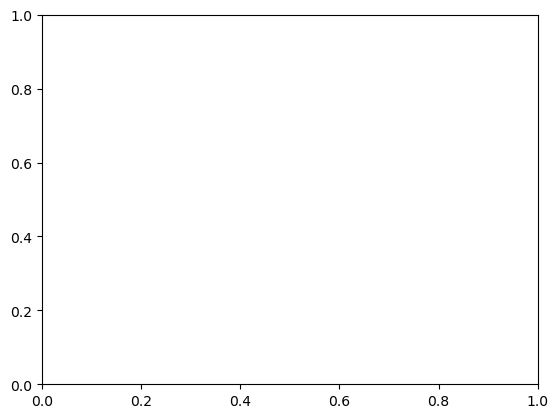

In [36]:
# Generating Plots of meangrade
plt.plot(meangrade, List_Stab[2], "ro")

ValueError: x and y must have same first dimension, but have shapes (500,) and (499,)

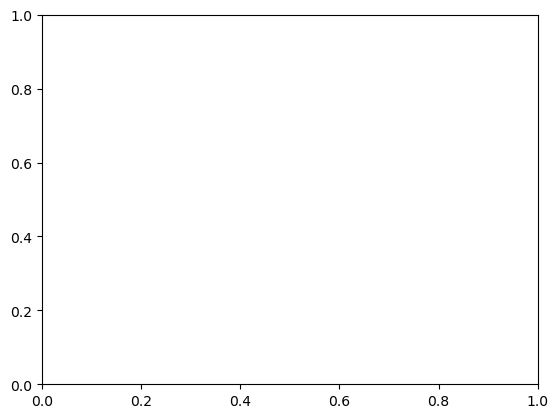

In [37]:
# Generating Plots of gammaminusbeta
plt.plot(gammaminusbeta, List_Stab[2], "ro")

In [38]:
MGL[0]

,0,1,2,3,4,5,6,7,8,9,10,11,12,13,14,15,16,17,18,19
0,0.00,0.01,0.01,0.01,0.01,0.01,0.01,0.01,0.01,0.01,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
1,0.01,0.00,0.01,0.01,0.01,0.01,0.01,0.01,0.01,0.01,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
2,0.01,0.01,0.00,0.01,0.01,0.01,0.01,0.01,0.01,0.01,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
3,0.01,0.01,0.01,0.00,0.01,0.01,0.01,0.01,0.01,0.01,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
4,0.01,0.01,0.01,0.01,0.00,0.01,0.01,0.01,0.01,0.01,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
5,0.01,0.01,0.01,0.01,0.01,0.00,0.01,0.01,0.01,0.01,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
6,0.01,0.01,0.01,0.01,0.01,0.01,0.00,0.01,0.01,0.01,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
7,0.01,0.01,0.01,0.01,0.01,0.01,0.01,0.00,0.01,0.01,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
8,0.01,0.01,0.01,0.01,0.01,0.01,0.01,0.01,0.00,0.01,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
9,0.01,0.01,0.01,0.01,0.01,0.01,0.01,0.01,0.01,0.00,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN


In [39]:
Graph = MGL[0].values

In [40]:
g = ig.Graph.Adjacency((Graph>0).tolist(), mode = 'undirected')

In [41]:
ig.summary(g)

IGRAPH U--- 20 90 -- 


In [107]:
communities = g.community_edge_betweenness()

In [108]:
communities = communities.as_clustering()

In [109]:
g.modularity(communities)

0.5

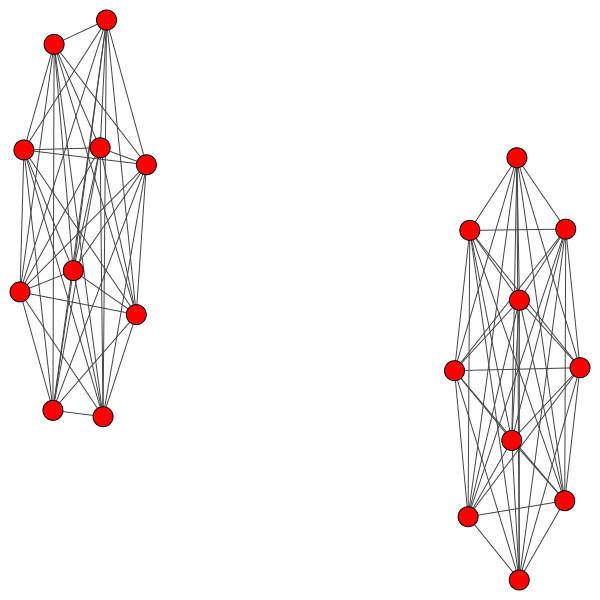

In [110]:
layout = g.layout()
ig.plot(g, layout=layout)

In [111]:
g.get_edgelist()

[(0, 1),
 (0, 2),
 (0, 3),
 (0, 4),
 (0, 5),
 (0, 6),
 (0, 7),
 (0, 8),
 (0, 9),
 (1, 2),
 (1, 3),
 (1, 4),
 (1, 5),
 (1, 6),
 (1, 7),
 (1, 8),
 (1, 9),
 (2, 3),
 (2, 4),
 (2, 5),
 (2, 6),
 (2, 7),
 (2, 8),
 (2, 9),
 (3, 4),
 (3, 5),
 (3, 6),
 (3, 7),
 (3, 8),
 (3, 9),
 (4, 5),
 (4, 6),
 (4, 7),
 (4, 8),
 (4, 9),
 (5, 6),
 (5, 7),
 (5, 8),
 (5, 9),
 (6, 7),
 (6, 8),
 (6, 9),
 (7, 8),
 (7, 9),
 (8, 9),
 (10, 11),
 (10, 12),
 (10, 13),
 (10, 14),
 (10, 15),
 (10, 16),
 (10, 17),
 (10, 18),
 (10, 19),
 (11, 12),
 (11, 13),
 (11, 14),
 (11, 15),
 (11, 16),
 (11, 17),
 (11, 18),
 (11, 19),
 (12, 13),
 (12, 14),
 (12, 15),
 (12, 16),
 (12, 17),
 (12, 18),
 (12, 19),
 (13, 14),
 (13, 15),
 (13, 16),
 (13, 17),
 (13, 18),
 (13, 19),
 (14, 15),
 (14, 16),
 (14, 17),
 (14, 18),
 (14, 19),
 (15, 16),
 (15, 17),
 (15, 18),
 (15, 19),
 (16, 17),
 (16, 18),
 (16, 19),
 (17, 18),
 (17, 19),
 (18, 19)]

In [112]:
g.degree(mode = "in")

[9, 9, 9, 9, 9, 9, 9, 9, 9, 9, 9, 9, 9, 9, 9, 9, 9, 9, 9, 9]

In [113]:
g.degree()

[9, 9, 9, 9, 9, 9, 9, 9, 9, 9, 9, 9, 9, 9, 9, 9, 9, 9, 9, 9]

In [114]:
# Modularity review
Modul = []
for i in range(0,len(MGL)):
    Graph = MGL[i].values
    g = ig.Graph.Adjacency((Graph>0).tolist(), mode = 'undirected')
    communities = g.community_edge_betweenness()
    communities = communities.as_clustering()
    modula = g.modularity(communities)
    Modul.append(modula)

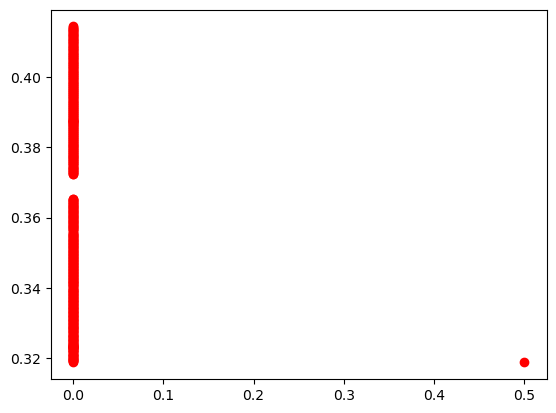

In [115]:
# Generating plots modularity
plt.plot(Modul, List_Stab[2], "ro")

In [116]:
# Modularity review
Modul = []
for i in range(0,len(MGL)):
    Graph = MGL[i].values
    g = ig.Graph.Adjacency((Graph>0).tolist(), mode = 'undirected')
    communities = g.community_multilevel().membership
    modula = g.modularity(communities)
    Modul.append(modula)

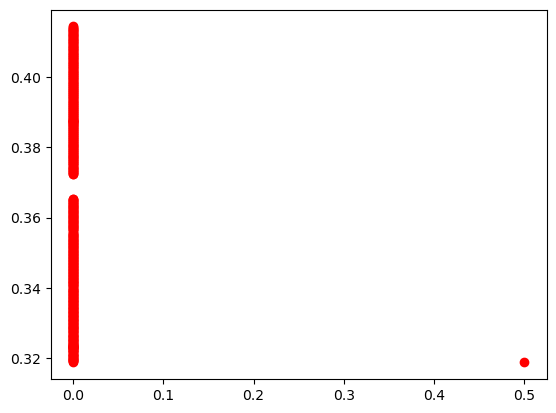

In [117]:
# Generating plots modularity
plt.plot(Modul, List_Stab[2], "ro")